# Lab 1: Adversarial Attacks and Defenses

##Name: Navya Sravani Jammalamadaka
##Net Id: nsj9072
##N Number: N19774260

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.2


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


## Build a DNN model

Build a `tf.keras.Sequential` model by stacking layers. 
Making the model with 300 layers and relu activation function with 0.2 Dropout

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.4464175 ,  0.6023062 , -0.19293877, -0.08046769, -0.70629543,
        -0.2485274 , -0.3731537 ,  0.03429224, -0.4163219 , -0.14029677]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class: 

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.07322627, 0.20898825, 0.09435206, 0.10558371, 0.05646813,
        0.08925027, 0.07879253, 0.11842313, 0.07546356, 0.099452  ]],
      dtype=float32)

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.



In [9]:
loss_fn(y_train[:1], predictions).numpy()

2.3080802

Before training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [10]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5065 - accuracy: 0.8207
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3838 - accuracy: 0.8592
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3517 - accuracy: 0.8713
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3301 - accuracy: 0.8785
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3163 - accuracy: 0.8828


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [12]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.3528 - accuracy: 0.8749 - 970ms/epoch - 3ms/step


[0.3527950048446655, 0.8748999834060669]

The image classifier is now trained to ~87% accuracy on the fashion_mnist dataset.

Building the initial signed gradient


In [13]:
image_tensor = tf.convert_to_tensor(x_test,dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(image_tensor)
    output = model(image_tensor)
    loss = loss_fn(y_test, output)
gradient = tape.gradient(loss, image_tensor)
signed_grad = tf.sign(gradient)

# Conducting Untargeted FGSM Attacks



In [14]:
import numpy as np
import matplotlib.pyplot as plt

Initial accuracy over clean images

In [15]:
accuracyofmodel = np.argmax(model.predict(x_test), axis=-1)
accuracyrate = 0

for i in range(len(accuracyofmodel)):
  if accuracyofmodel[i] == y_test[i]:
    accuracyrate = accuracyrate+1
  else:
    accuracyrate = accuracyrate+0
accuracyrate = accuracyrate/10000
print(accuracyrate)

313/313 [==============================] - 1s 2ms/step
0.8749


0.09803921568627451
313/313 - 1s - loss: 3.7699 - accuracy: 0.1493 - 608ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step


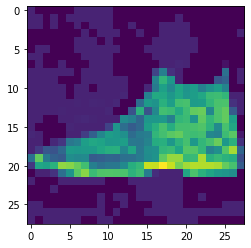

epsilon,accuracy 0.09803921568627451 0.8293519259343926
0.19607843137254902
313/313 - 1s - loss: 12.0182 - accuracy: 0.0065 - 657ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step


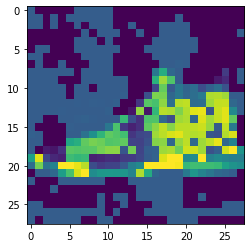

epsilon,accuracy 0.19607843137254902 0.9925705794947994
0.29411764705882354
313/313 - 1s - loss: 25.2004 - accuracy: 0.0024 - 614ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step


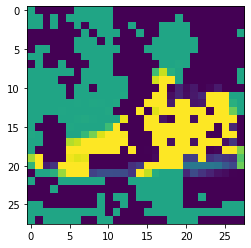

epsilon,accuracy 0.29411764705882354 0.9972568293519259
0.49019607843137253
313/313 - 1s - loss: 42.1266 - accuracy: 0.0021 - 639ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step


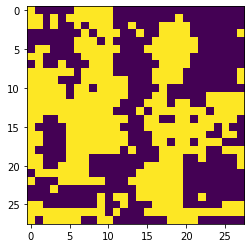

epsilon,accuracy 0.49019607843137253 0.9975997256829352
[82.93519259 99.25705795 99.72568294 99.75997257]


In [16]:
epsilon = [25,50,75,125]
new_epsilon = [0,0,0,0]
#Dividing each epsilon over 255
for j in range(len(epsilon)):
  new_epsilon[j] = epsilon[j]/255

accuracyuntargeted = np.zeros(shape=(len(epsilon)))
adversarial_array = x_test
adversarial_arrayLabel = y_test
adversarial_arrayLabel = adversarial_arrayLabel.copy()


for i in range(len(epsilon)):
  accuracy = 0
  print(new_epsilon[i])
  for k in range(len(x_test)):
    image = x_test[k]  

    #Using formula from the slides to run untargeted attack
    adversarial_array[k] = image + signed_grad[k]*new_epsilon[i]
    adversarial_array[k] = tf.clip_by_value(adversarial_array[k], 0, 1)
    adversarial_arrayLabel[k] = y_test[k]

  #Finding the sucessrate of the attack over the model
  model.evaluate(adversarial_array,  adversarial_arrayLabel, verbose=2)
 
  #Building the prediction matrix
  untargeted_predictions = np.argmax(model.predict(adversarial_array), axis=-1)
  for l in range(len(y_test)):
    if untargeted_predictions[l] == adversarial_arrayLabel[l]:
      #Counting the number of correctly predicted images despite the attack
      accuracy = accuracy+1
    else:
      accuracy = accuracy+0
  testacc = accuracy/10000
  
  #Calculating the success rate of the attack by finding the number of images correctly classified before the attack v/s after te attack
  attackacc = 1 - testacc/accuracyrate
  plt.imshow(adversarial_array[0])
  plt.show()
  accuracyuntargeted[i] = attackacc*100
  print("epsilon,accuracy",new_epsilon[i],attackacc)

print(accuracyuntargeted)

# Conducting Targeted FGSM attacks

Redefining x_test to ensure only clean images are used

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Building the matrix for target classes

In [18]:
targetclasses = np.zeros(shape=len(y_test))
for i in range(len(y_test)):
  targetclasses[i] = (y_test[i]+1)%10
 


Calculating the gradient with respect to target classes

In [19]:
image_tensor2 = tf.convert_to_tensor(x_test,dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(image_tensor2)
    output2 = model(image_tensor2)
    loss2 = loss_fn(targetclasses, output2)
gradient2 = tape.gradient(loss2, image_tensor2)
signed_grad2 = tf.sign(gradient2)

Running the targeted attack which is a modified version of the untargeted attack.



0.09803921568627451
313/313 - 1s - loss: 2.1942 - accuracy: 0.3010 - 609ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step
Prediction of Sample: 6 Correct Label of Sample: 9


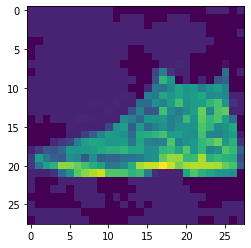

epsilon,accuracy 0.09803921568627451 0.6559606812207109
0.19607843137254902
313/313 - 1s - loss: 9.1450 - accuracy: 0.0135 - 621ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step
Prediction of Sample: 6 Correct Label of Sample: 9


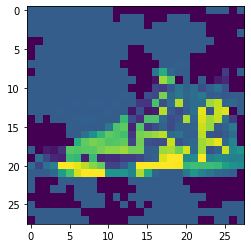

epsilon,accuracy 0.19607843137254902 0.9845696651045834
0.29411764705882354
313/313 - 1s - loss: 22.7338 - accuracy: 0.0023 - 622ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step
Prediction of Sample: 6 Correct Label of Sample: 9


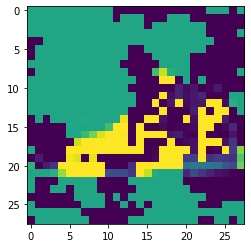

epsilon,accuracy 0.29411764705882354 0.997371128128929
0.49019607843137253
313/313 - 1s - loss: 42.9869 - accuracy: 0.0017 - 587ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step
Prediction of Sample: 6 Correct Label of Sample: 9


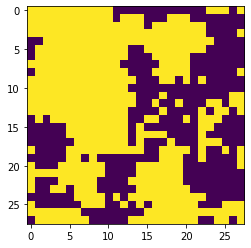

epsilon,accuracy 0.49019607843137253 0.9980569207909475
[65.59606812 98.45696651 99.73711281 99.80569208]


In [20]:
accuracytargeted = np.zeros(shape=(len(epsilon)))
adversarial_arraytarget = x_test
targetLabel = y_test
targetLabel=targetLabel.copy()
for i in range(len(epsilon)):
  accuracy = 0
  print(new_epsilon[i])
  for k in range(len(x_test)):
    image = x_test[k]  

    #Using formula from the slides to caonduct the targeted fgsm attack 
    adversarial_arraytarget[k] = image - signed_grad2[k]*new_epsilon[i]
    adversarial_arraytarget[k] = tf.clip_by_value(adversarial_arraytarget[k], 0, 1)
    targetLabel[k]=y_test[k]

  model.evaluate(adversarial_arraytarget,  targetLabel, verbose=2)
  targeted_predictions = np.argmax(model.predict(adversarial_arraytarget), axis=-1)
  
  for l in range(len(y_test)):
    if targeted_predictions[l] == targetLabel[l]:
      accuracy = accuracy+1
    else:
      accuracy = accuracy+0
  testacc = accuracy/10000
  attackacc = 1 - testacc/accuracyrate
  print("Prediction of Sample:",targeted_predictions[0],"Correct Label of Sample:",targetLabel[0])
  plt.imshow(adversarial_arraytarget[0])
  plt.show()
  accuracytargeted[i] = attackacc*100
  print("epsilon,accuracy",new_epsilon[i],attackacc)

print(accuracytargeted)

Visualizing and Tabulating Accuracies of targeted and untargeted attacks over epsilon

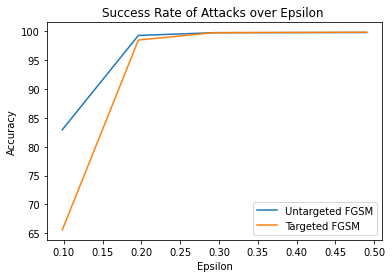

In [21]:
plt.plot(new_epsilon, accuracyuntargeted, label = "Untargeted FGSM")
plt.plot(new_epsilon, accuracytargeted, label = "Targeted FGSM")
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Success Rate of Attacks over Epsilon ')
plt.legend()
plt.show() 

In [22]:
from astropy.table import QTable, Table, Column
from astropy import units as u
t = Table()
t = Table([new_epsilon, accuracyuntargeted, accuracytargeted], names=('Epsilon', 'Untargeted FGSM', 'Targeted FGSM'))
print(t)

      Epsilon        Untargeted FGSM    Targeted FGSM  
------------------- ----------------- -----------------
0.09803921568627451 82.93519259343925 65.59606812207109
0.19607843137254902 99.25705794947994 98.45696651045834
0.29411764705882354  99.7256829351926  99.7371128128929
0.49019607843137253 99.75997256829352 99.80569207909475


#Adversial Retraining

Building the gradient for training data

In [23]:
image_tensor3 = tf.convert_to_tensor(x_train,dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(image_tensor3)
    output3 = model(image_tensor3)
    loss3 = loss_fn(y_train, output3)
gradient3 = tape.gradient(loss3, image_tensor3)
signed_grad3 = tf.sign(gradient3)

Conducting the untargeted attack on training data

In [24]:
accuracytargeted = np.zeros(shape=(len(epsilon)))
adversarial_arraytargettrain = x_train
adversarial_labels = y_train
adversarial_labels = adversarial_labels.copy()


for k in range(len(x_train)):
  image = x_train[k]  
  adversarial_arraytargettrain[k] = image + signed_grad3[k]*0.49019607843  #125/255
  adversarial_arraytargettrain[k] = tf.clip_by_value(adversarial_arraytargettrain[k], 0, 1)
  adversarial_labels[k] = y_train[k]

In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.append(x_train,adversarial_arraytargettrain,axis=0)
y_train = np.append(y_train,adversarial_labels,axis=0)

new_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [26]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [27]:
new_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [28]:
new_model.compile(optimizer='adam',
              loss=new_loss_fn,
              metrics=['accuracy'])

In [29]:
new_model.fit(x_train, y_train,
          batch_size=32,
          epochs=10)

Epoch 1/10
3750/3750 [==============================] - 17s 4ms/step - loss: 0.2996 - accuracy: 0.8954
Epoch 2/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2132 - accuracy: 0.9226
Epoch 3/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1931 - accuracy: 0.9302
Epoch 4/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1806 - accuracy: 0.9340
Epoch 5/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1726 - accuracy: 0.9369
Epoch 6/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1665 - accuracy: 0.9388
Epoch 7/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1588 - accuracy: 0.9418
Epoch 8/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1548 - accuracy: 0.9425
Epoch 9/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1486 - accuracy: 0.9450
Epoch 10/10
3750/3750 [==============================] - 16s 4ms/step - l

Calculating the training accuracy on the clean test set

In [30]:
print("Loss,Accuracy of clean images on the Modified DNN:", new_model.evaluate(x=x_test, y=y_test, verbose=2))

313/313 - 1s - loss: 0.3276 - accuracy: 0.8835 - 805ms/epoch - 3ms/step
Loss,Accuracy of clean images on the Modified DNN: [0.32763558626174927, 0.8834999799728394]


Running the attack on the clean test set

In [31]:
image_tensor4 = tf.convert_to_tensor(x_test,dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(image_tensor4)
    output4 = new_model(image_tensor4)
    loss4 = new_loss_fn(y_test, output4)
gradient4 = tape.gradient(loss4, image_tensor4)
signed_grad4 = tf.sign(gradient4)

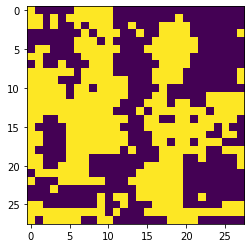

epsilon,accuracy 0.49019607843137253 0.9980569207909475
[82.93519259 99.25705795 99.72568294 99.80569208]


In [32]:
adversarial_arrayRetrain = x_test
adversarial_retrainLabel = y_test
adversarial_retrainLabel = adversarial_retrainLabel.copy()


for i in range(len(epsilon)):
  for k in range(len(x_test)):
    image = x_test[k]  
    adversarial_arrayRetrain[k] = image + signed_grad4[k]*0.4901960784 #125/255
    adversarial_arrayRetrain[k] = tf.clip_by_value(adversarial_arrayRetrain[k], 0, 1)
    adversarial_retrainLabel[k] = y_test[k]


attackacc = 1 - testacc/accuracyrate
plt.imshow(adversarial_array[0])
plt.show()
accuracyuntargeted[i] = attackacc*100
print("epsilon,accuracy",new_epsilon[i],attackacc)

print(accuracyuntargeted)

Calculating the accuracy on the attacked test set

In [33]:
print("Loss,Accuracy of perturbed images on the Modified DNN:", new_model.evaluate(x=adversarial_arrayRetrain, y=adversarial_retrainLabel, verbose=2))

313/313 - 1s - loss: 25.3541 - accuracy: 0.3949 - 724ms/epoch - 2ms/step
Loss,Accuracy of perturbed images on the Modified DNN: [25.3541259765625, 0.39489999413490295]


313/313 [==============================] - 1s 2ms/step
Prediction of Sample: 8 Correct Label of Sample: 9


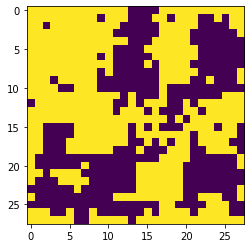

epsilon,accuracy 0.49019607843137253 0.9980569207909475
[ 0.          0.          0.         93.56497885]


In [34]:
adv_predictions = np.argmax(model.predict(adversarial_arrayRetrain), axis=-1)
  
for l in range(len(y_test)):
  if adv_predictions[l] == adversarial_retrainLabel[l]:
    accuracy = accuracy+1
  else:
    accuracy = accuracy+0
testacc = accuracy/10000
  
advattackacc = 1 - testacc/accuracyrate
print("Prediction of Sample:",adv_predictions[0],"Correct Label of Sample:",adversarial_retrainLabel[0])
plt.imshow(adversarial_arrayRetrain[0])
plt.show()
accuracytargeted[i] = advattackacc*100
print("epsilon,accuracy",new_epsilon[i],attackacc)

print(accuracytargeted)

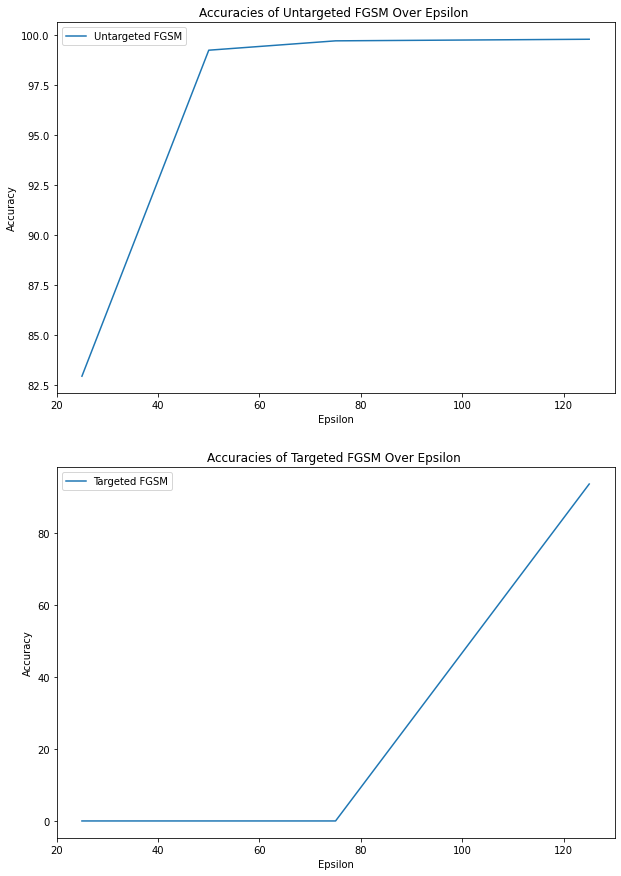

In [47]:
plt.figure(figsize = (10,15))
plt.subplot(2, 1, 1)
plt.plot(epsilon, accuracyuntargeted, label = "Untargeted FGSM")
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Accuracies of Untargeted FGSM Over Epsilon ')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(epsilon, accuracytargeted, label = "Targeted FGSM")
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Accuracies of Targeted FGSM Over Epsilon ')
plt.legend()
plt.show() 

#Challenge

In [36]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()
x_train_fashion, x_test_fashion = x_train_fashion / 255.0, x_test_fashion / 255.0

In [37]:
print(x_train_fashion.shape)
print(x_test_fashion.shape)

(60000, 28, 28)
(10000, 28, 28)


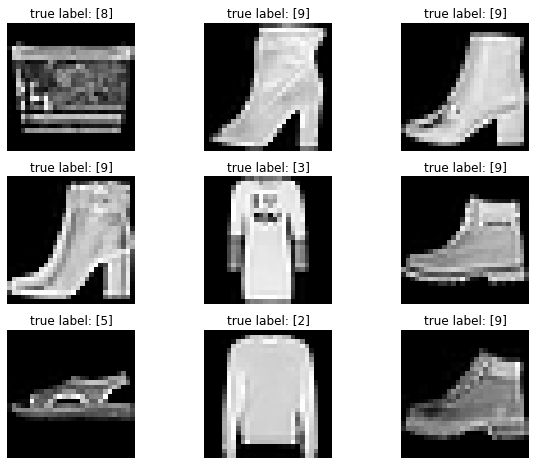

In [38]:
figure = plt.figure(figsize=(10,8))
cols, rows = 3,3
for i in range(1, cols*rows+1):
  index = np.random.randint(x_train_fashion.shape[0], size=1)
  img, label = (x_train_fashion[index], y_train_fashion[index])
  figure.add_subplot(rows, cols, i)
  plt.title("true label: {}".format(label))
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [39]:
DNN_fashion = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(10)                                 
])

In [40]:
DNN_fashion.compile(optimizer='adam', loss=loss_fn,metrics=['accuracy'])
DNN_fashion.fit(x_train_fashion, y_train_fashion, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4839 - accuracy: 0.8275
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3634 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3253 - accuracy: 0.8802
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2996 - accuracy: 0.8894
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2847 - accuracy: 0.8933


In [41]:
res = DNN_fashion.evaluate(x_test_fashion,  y_test_fashion, verbose=2)


313/313 - 1s - loss: 0.3399 - accuracy: 0.8749 - 847ms/epoch - 3ms/step


In [42]:
def generate_perturb_untarget_im_iter(iteration, model, X, Y, epislon):
  x_perturb = [] 
  x_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
  for i in range(iteration):
    
    with tf.GradientTape() as tape:
      tape.watch(x_tensor)
      pred = model(x_tensor)
      loss = loss_fn(Y, pred)
    grad = tape.gradient(loss, x_tensor)
    grad_sign = tf.sign(grad)
    x_tensor = tf.clip_by_value((x_tensor + epislon * grad_sign), clip_value_min = 0, clip_value_max = 1)
  x_perturb.append(x_tensor)
  return x_perturb

In [43]:
def calRMSE(adv_img, ori_img):
  RMSE = []
  for i, img in enumerate(adv_img):
    rmse = np.sqrt(np.sum((img-ori_img[i])**2)/(28*28))
    RMSE.append(rmse)
    
  return np.sum(RMSE)/len(RMSE)

In [44]:
x_perturb_fashion = generate_perturb_untarget_im_iter(5, DNN_fashion, x_test_fashion, y_test_fashion, 1/255)


In [45]:
RMSE = calRMSE(x_perturb_fashion[0], x_test_fashion)
print("The RMSE of original images and perturb images is: {}".format(RMSE))


The RMSE of original images and perturb images is: 0.016626010452141203


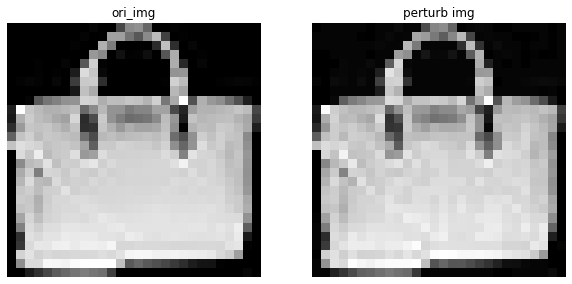

In [46]:
figure = plt.figure(figsize=(10,8))
index = np.random.randint(x_test_fashion.shape[0], size=1)
img1, label1 = (x_test_fashion[index], y_test_fashion[index])
figure.add_subplot(1, 2, 1)
plt.title("ori_img")
plt.axis("off")
plt.imshow(img1.squeeze(), cmap="gray")
img2, label2 = (np.array(x_perturb_fashion[0][index[0]]), y_test_fashion[index])
figure.add_subplot(1, 2, 2)
plt.title("perturb img")
plt.axis("off")
plt.imshow(img2.squeeze(), cmap="gray")
plt.show()

#References


https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb#scrollTo=h3IKyzTCDNGo

https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/adversarial_fgsm.ipynb

https://medium.com/analytics-vidhya/implementing-adversarial-attacks-and-defenses-in-keras-tensorflow-2-0-cab6120c5715

https://github.com/soumyac1999/FGSM-Keras

https://github.com/EvolvedSquid/tutorials/blob/master/adversarial-attacks-defenses/adversarial-tutorial.ipynb

https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-5.php